In [2]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 194kB 10.2MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 234kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


In [4]:
from fastai.vision.all import *

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [12]:
root_dir = 'gdrive/My Drive/SARI/Smapshot/'
base_dir = root_dir
path=Path(base_dir)

In [18]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
      get_items=get_image_files,
      get_y=parent_label,
      splitter=RandomSplitter(valid_pct=0.2, seed=42),
      item_tfms=RandomResizedCrop(224, min_scale=0.5),
      batch_tfms=aug_transforms())

In [19]:
dls = fields.dataloaders(path)

In [21]:
dls.vocab

['landscape', 'not landscape']

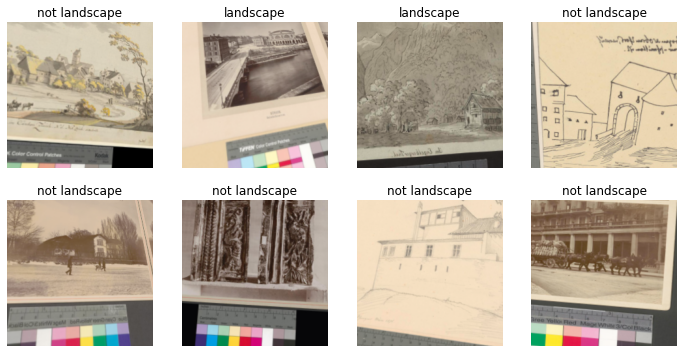

In [22]:
dls.train.show_batch(max_n=8, nrows=2)

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


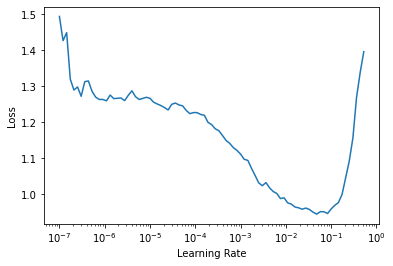

In [24]:
lr_min, lr_steep = learn.lr_find()

In [25]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.868492,0.643148,0.197500,02:09
1,0.705113,0.604773,0.212500,00:38
2,0.564760,0.440075,0.175000,00:38
3,0.455924,0.382452,0.135000,00:38
4,0.402334,0.366600,0.140000,00:38


In [26]:
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=slice(1e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.331836,0.430122,0.160000,00:39
1,0.303103,0.359906,0.140000,00:39
2,0.273439,0.495505,0.155000,00:39
3,0.240388,0.372675,0.137500,00:39
4,0.201280,0.432461,0.140000,00:39
5,0.173456,0.407090,0.147500,00:39


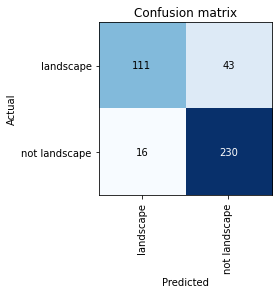

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()